In [18]:
# pip install factor_analyzer

# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris

from factor_analyzer import FactorAnalyzer
# from sklearn.decomposition import FactorAnalysis

import matplotlib.pyplot as plt

# Loading Data

Let's perform factor analysis on BFI (dataset based on personality assessment project), which were collected using a 6 point response scale: 

    1 Very Inaccurate, 
    2 Moderately Inaccurate, 
    3 Slightly Inaccurate 
    4 Slightly Accurate, 
    5 Moderately Accurate, and 
    6 Very Accurate. 
    


In [19]:
location = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\bfi.csv'

In [20]:
df= pd.read_csv(location)

# Preprocess Data

In [21]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [22]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0', 'gender', 'education', 'age'],axis=1,inplace=True)

In [23]:
# Dropping missing values rows
df.dropna(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
A1    2436 non-null float64
A2    2436 non-null float64
A3    2436 non-null float64
A4    2436 non-null float64
A5    2436 non-null float64
C1    2436 non-null float64
C2    2436 non-null float64
C3    2436 non-null float64
C4    2436 non-null float64
C5    2436 non-null float64
E1    2436 non-null float64
E2    2436 non-null float64
E3    2436 non-null float64
E4    2436 non-null float64
E5    2436 non-null float64
N1    2436 non-null float64
N2    2436 non-null float64
N3    2436 non-null float64
N4    2436 non-null float64
N5    2436 non-null float64
O1    2436 non-null float64
O2    2436 non-null int64
O3    2436 non-null float64
O4    2436 non-null float64
O5    2436 non-null float64
dtypes: float64(24), int64(1)
memory usage: 494.8 KB


In [25]:
df.sample(6)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
1747,1.0,6.0,6.0,4.0,6.0,6.0,6.0,5.0,1.0,5.0,...,5.0,5.0,6.0,4.0,5.0,6.0,1,6.0,6.0,1.0
134,1.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,6.0,5.0,...,6.0,6.0,4.0,5.0,6.0,5.0,6,6.0,6.0,2.0
600,1.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,2.0,4.0,...,2.0,1.0,1.0,2.0,4.0,6.0,1,4.0,6.0,2.0
643,4.0,6.0,6.0,6.0,6.0,4.0,3.0,1.0,3.0,2.0,...,3.0,6.0,6.0,2.0,1.0,5.0,4,3.0,5.0,1.0
2347,3.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,3.0,5.0,...,2.0,2.0,4.0,3.0,2.0,6.0,2,4.0,5.0,4.0
2540,4.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0,...,5.0,5.0,6.0,4.0,5.0,4.0,4,4.0,4.0,4.0


# Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. 

Factorability means "can we find the factors in the dataset?". 

There are 2 methods to check the factorability or sampling adequacy:

#### Bartlett’s test of sphericity  

checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. 

$H_0$: The matrix of population correlations is equal to I. 

$H_1$: The matrix of population correlations is not equal to I.

If the test found statistically insignificant, you should not employ a factor analysis.

Returns

• statistic (float) – The chi-square value.

• p_value (float) – The associated p-value for the test.

In [27]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350869236, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

#### Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 

This statistic represents the degree to which each observed variable is predicted, without error, by the other variables in the dataset

KMO values range between 0 and 1. 

Value of KMO less than 0.6 is considered inadequate. 
The KayserMeyerOlkin KMO value should be higher than 0.5%  

Returns

• kmo_per_variable (numpy array) – The KMO score per item.

• kmo_total (float) – The KMO score overall.

In [34]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.848539722194922

In [35]:
kmo_all

array([0.75391928, 0.8363196 , 0.87010963, 0.87795367, 0.90348747,
       0.84325413, 0.79568263, 0.85186857, 0.82647206, 0.86401687,
       0.83801873, 0.88380544, 0.89697008, 0.87731273, 0.89332158,
       0.77933902, 0.78025018, 0.86229919, 0.88518467, 0.86014155,
       0.85858672, 0.78019798, 0.84434957, 0.77003158, 0.76144469])

The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

# Choosing the Number of Factors

For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [36]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None, n_factors=25)

fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

In [37]:
fa.get_eigenvalues()

(array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
        1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
        0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
        0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
        0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902]),
 array([ 4.73899341e+00,  2.39633009e+00,  1.70232176e+00,  1.35374983e+00,
         1.10683548e+00,  6.19258383e-01,  3.88519725e-01,  3.46797169e-01,
         2.43243996e-01,  2.34526072e-01,  2.02724056e-01,  1.60041981e-01,
         1.29649423e-01,  1.17501568e-01,  9.87727800e-02,  9.09908021e-02,
         7.66931731e-02,  5.44449067e-02,  4.14916472e-02,  2.23919155e-02,
         1.44232046e-02,  1.14479480e-02,  3.53863160e-03,  1.07866629e-03,
        -1.63734262e-06]))

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

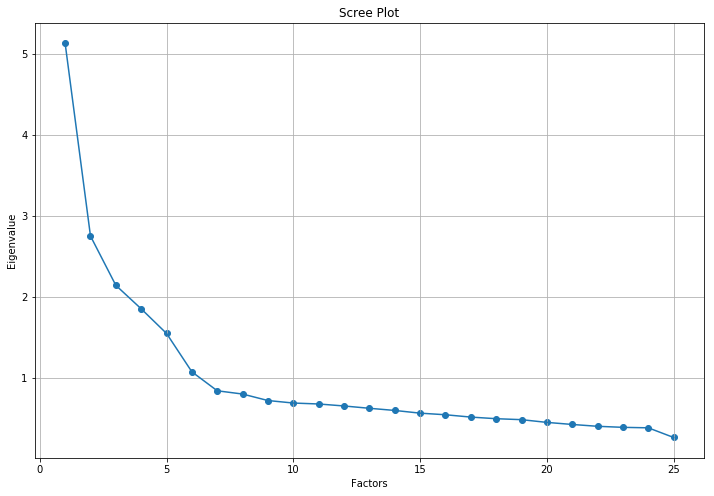

In [38]:
# Create scree plot using matplotlib
plt.figure(figsize=(12, 8))

plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(   range(1, df.shape[1]+1), ev)

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

# Performing Factor Analysis

In [43]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax', n_factors=6)

fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=6, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [52]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

In [46]:
fa.loadings_

array([[ 9.52197424e-02,  4.07831569e-02,  4.87338848e-02,
        -5.30987348e-01, -1.13057329e-01,  1.61216350e-01],
       [ 3.31312765e-02,  2.35538041e-01,  1.33714395e-01,
         6.61140979e-01,  6.37337867e-02, -6.24353650e-03],
       [-9.62088442e-03,  3.43008175e-01,  1.21353368e-01,
         6.05932691e-01,  3.39902647e-02,  1.60106428e-01],
       [-8.15175588e-02,  2.19716722e-01,  2.35139532e-01,
         4.04594038e-01, -1.25338020e-01,  8.63557033e-02],
       [-1.49615885e-01,  4.14457676e-01,  1.06382166e-01,
         4.69698288e-01,  3.09765721e-02,  2.36519341e-01],
       [-4.35840219e-03,  7.72477530e-02,  5.54582255e-01,
         7.51069524e-03,  1.90123730e-01,  9.50350463e-02],
       [ 6.83300837e-02,  3.83703848e-02,  6.74545451e-01,
         5.70549867e-02,  8.75925911e-02,  1.52775080e-01],
       [-3.99936734e-02,  3.18673009e-02,  5.51164439e-01,
         1.01282241e-01, -1.13380873e-02,  8.99628323e-03],
       [ 2.16283366e-01, -6.62407729e-02, -6.384

In [58]:
# create a df for factor loadings
df_loadings = pd.DataFrame(fa.loadings_, 
                           index=df.columns, 
                           columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'])

In [59]:
df_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


In [60]:
# number of top n variables
n = 6

In [61]:
# get the 10 6 variables for facor 1
idx_factor1 = df_loadings.abs().sort_values(['Factor1'], ascending=False).index

df_loadings.loc[idx_factor1][:n]

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
N1,0.805806,0.068011,-0.051264,-0.174849,-0.074977,-0.096266
N2,0.789832,0.022958,-0.037477,-0.141134,0.006726,-0.139823
N3,0.725081,-0.065687,-0.059039,-0.019184,-0.010664,0.062495
N4,0.578319,-0.345072,-0.162174,0.000403,0.062916,0.147551
N5,0.523097,-0.161675,-0.025305,0.090125,-0.161892,0.120049
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


In [64]:
# get the 10 6 variables for facor 2
idx_factor2 = df_loadings.abs().sort_values(['Factor2'], ascending=False).index
df_loadings.loc[idx_factor2][:n]

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
E2,0.233624,-0.684578,-0.088497,-0.116716,-0.045561,0.115065
E4,-0.136788,0.658395,0.113798,0.241143,-0.107808,0.158513
E1,0.022280,-0.590451,0.053915,-0.130851,-0.071205,0.156583
E3,-0.000895,0.556774,0.103390,0.179396,0.241180,0.267291
E5,0.034490,0.507535,0.309813,0.078804,0.200821,0.008747
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519


In [65]:
# get the 10 6 variables for facor 3
idx_factor3 = df_loadings.abs().sort_values(['Factor3'], ascending=False).index
df_loadings.loc[idx_factor3, ['Factor3']][:n]

,Factor3
C2,0.674545
C4,-0.638475
C1,0.554582
C3,0.551164
C5,-0.544838
E5,0.309813


#### get_factor_variance()

Calculate the 
- factor variance information, 
    - including variance, 
    - proportional variance and 
    - cumulative variance for each factor

Returns

    • variance (numpy array) – The factor variances.
    • proportional_variance (numpy array) – The proportional factor variances.
    • cumulative_variances (numpy array) – The cumulative factor variances.

In [66]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.7269887 , 2.60223902, 2.07347064, 1.71349909, 1.50483135,
        0.63029714]),
 array([0.10907955, 0.10408956, 0.08293883, 0.06853996, 0.06019325,
        0.02521189]),
 array([0.10907955, 0.21316911, 0.29610793, 0.3646479 , 0.42484115,
        0.45005304]))

In [68]:
# create a df for factor loadings
df_var = pd.DataFrame(fa.get_factor_variance(), 
                        index=['The factor variances', 'proportional_variance', 'cumulative_variances'], 
                        columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'])

df_var

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
The factor variances,2.726989,2.602239,2.073471,1.713499,1.504831,0.630297
proportional_variance,0.109080,0.104090,0.082939,0.068540,0.060193,0.025212
cumulative_variances,0.109080,0.213169,0.296108,0.364648,0.424841,0.450053


Total 45% cumulative Variance explained by the 6 factors.

## Pros and Cons of Factor Analysis
- Factor analysis explores large dataset and finds interlinked associations. 

- It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. 

- Also, It helps in improve questionnaire in for future surveys. 

- Factors make for more natural data interpretation.

- Results of factor analysis are __controversial__. 
- Its interpretations can be __debatable__ because more than one interpretation can be made of the same data factors. 

After factor identification and naming of factors requires __domain knowledge.__

## another example

In [76]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

In [78]:
iris = load_iris()
X, y = iris.data, iris.target

In [80]:
df_iris = pd.DataFrame(X, columns = iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None, n_factors=25)

fa.fit(df_iris)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

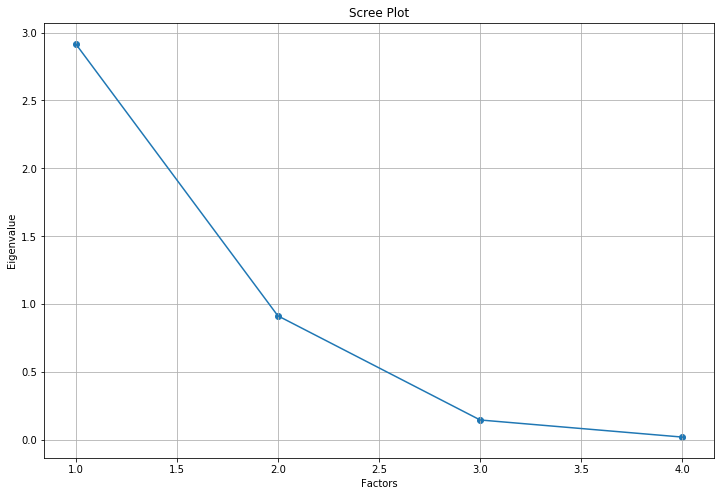

In [82]:
# Create scree plot using matplotlib
plt.figure(figsize=(12, 8))

plt.scatter(range(1, df_iris.shape[1]+1), ev)
plt.plot(   range(1, df_iris.shape[1]+1), ev)

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [92]:
factor = FactorAnalysis(n_components=4, random_state=101).fit(X)

In [93]:
pd.DataFrame(factor.components_,columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


In [94]:
factor.components_

array([[ 0.70698856, -0.15800499,  1.65423609,  0.70084996],
       [ 0.115161  ,  0.15963548, -0.04432109, -0.01403039],
       [-0.        ,  0.        ,  0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , -0.        ]])